<a href="https://colab.research.google.com/github/SlabberP/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**

*   Author: Pieter Slabber




## **Project Overview**

Project 1 - Part 2

Part 1:

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

Title your repository “Prediction of Product Sales”
This first project will be a sales prediction for food items sold at various stores. We want to avoid calling this something vague like "project1." Remember, this will be used to show potential employers your data science skills!
3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

Part 2:

As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

Download the data using this link: download the data. (Note: Original data source).
Insert code below the heading "Loading Data"
Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
Insert code below the heading "Data Cleaning"
Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:
1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Part 3:

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:


*   Histograms to view the distributions of numerical features in your dataset.
*   Boxplots to view statistical summaries of numerical features in your dataset.
*   Countplots to view the frequency of each class of categorial features in your dataset.
*   Heatmap to view the correlation between features.

Here is the Data Dictionary for this dataset:


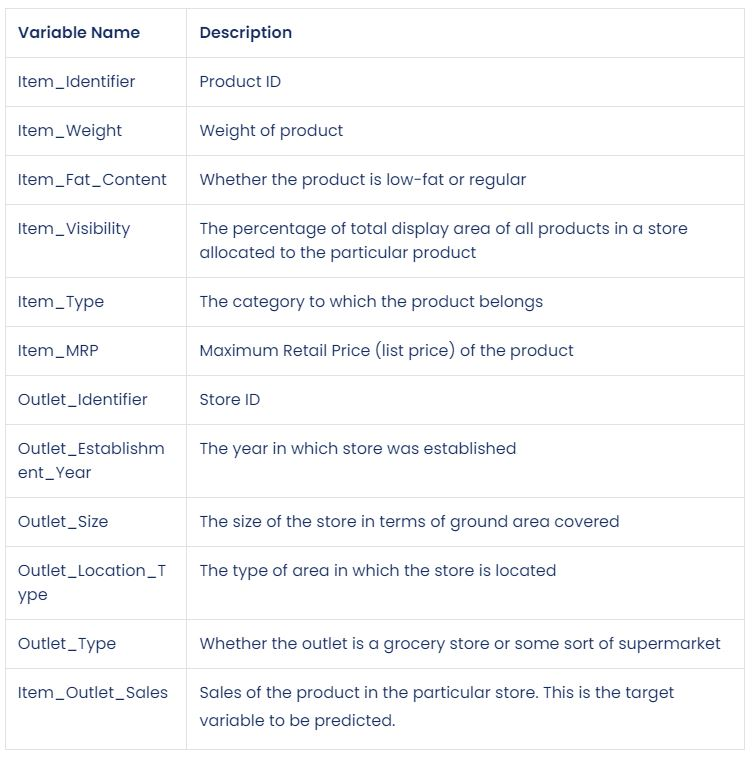

## **Imports**

In [74]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**

In [75]:


# Save the filep# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

fpath  ="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

df = pd.read_csv(fpath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Clean Data**

1) How many rows and columns?

In [76]:
# Get Dataframe statistics
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

Answer: Rows = 8523 ,
        Columns = 12

2) What are the datatypes of each variable?

In [77]:
# Get the datatypes of each comun in the dataframe
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [78]:
# Query for duplicates
df.duplicated().sum()
# Remove duplicates if any exists
df.drop_duplicates(inplace = True)

4) Identify missing values.

In [79]:
# Identify missing values or null values
df.isna().sum()
# Identifying % of missing data
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

5) Address the missing values by using a placeholder value.

In [80]:
# Replace the null with a 'Not specified' in the Item_Weight column.
df['Item_Weight'] = df['Item_Weight'].fillna('Not specified')

In [81]:
# Replace the null with a 'No Size' in the Outlet_Size column.
df['Outlet_Size'] = df['Outlet_Size'].fillna('No Size')

6) Confirm that there are no missing values after addressing them.

In [82]:
# Check again for missing or null values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [83]:
# Find inconsistencies
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [84]:
# Find inconsistencies in all columns
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Weight:
Not specified    1463
12.15              86
17.6               82
13.65              77
11.8               76
                 ... 
7.275               2
7.685               1
9.42                1
6.52                1
5.4                 1
Name: Item_Weight, Length: 416, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Dri

In [85]:
# Fix inconsistencies
# Column Item_Fat_Content. Replacing 'LF' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
# Column Item_Fat_Content. Replacing 'low fat' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
# Column Item_Fat_Content. Replacing 'reg' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')


In [86]:
# Find numerical columns
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

# Get the minimum value for each column
min_values = df[num_cols].min()
# print("Minimum values:")
print(min_values)

# Get the maximum value for each column
max_values = df[num_cols].max()
# print("\nMaximum values:")
print(max_values)

# Get the mean value for each column
mean_values = df[num_cols].mean()
# print("\nMean values:")
print(mean_values)

Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64


## **Exploratory Data Analysis**

Histograms to view the distributions of numerical features in your dataset.

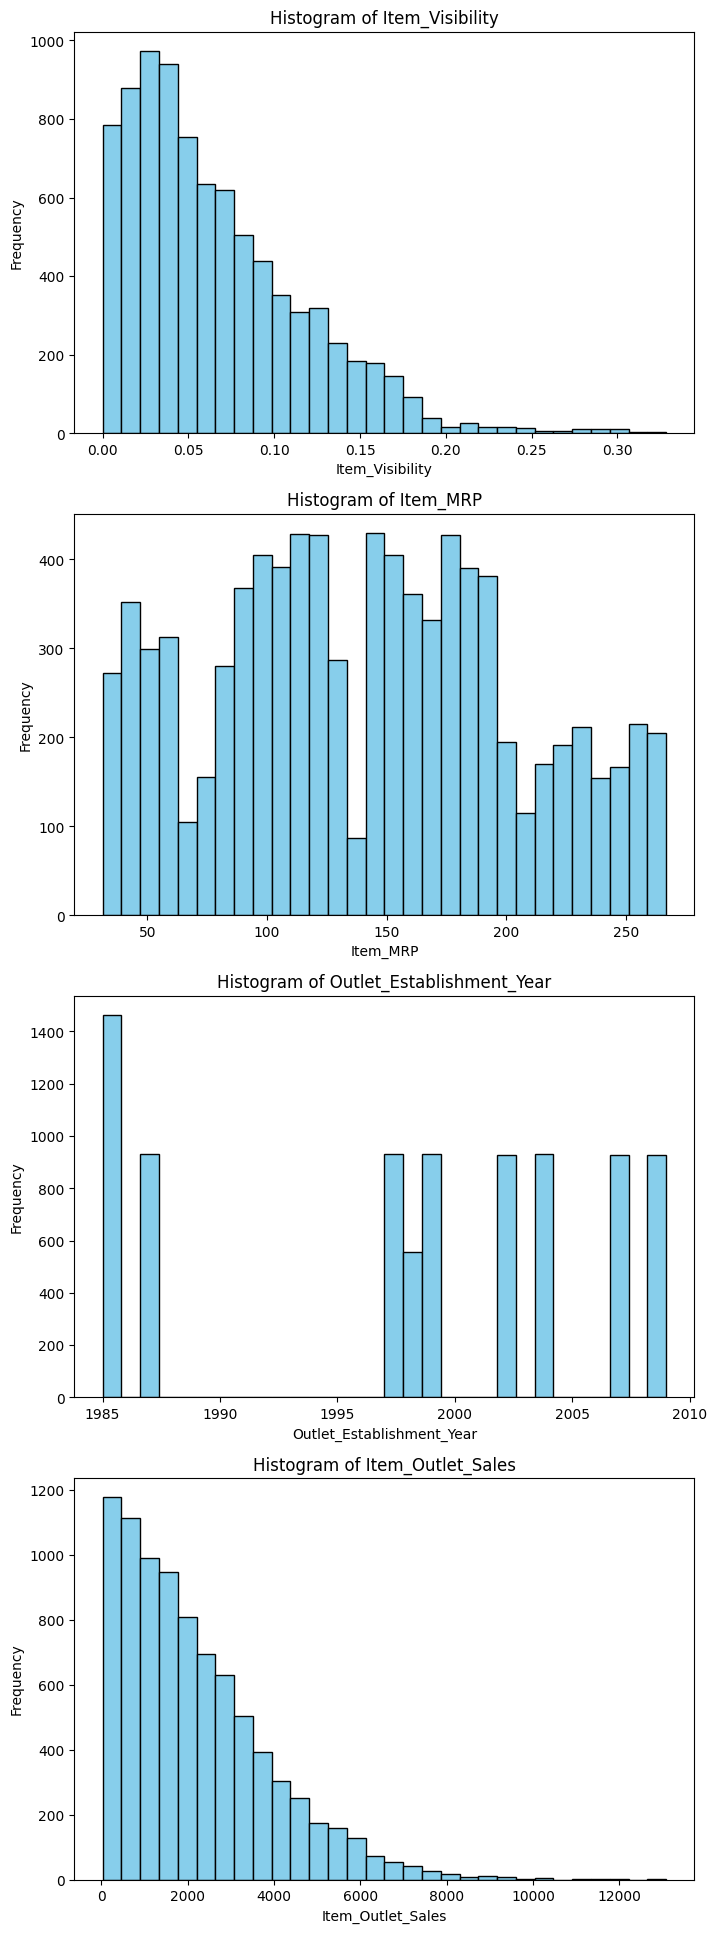

In [87]:
# Select the numerical columns
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

# Create subplots for each feature(column)
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 6 * len(num_cols)))

# Plot histograms for each feature
for i, feature in enumerate(num_cols):
    axes[i].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')


Boxplots to view statistical summaries of numerical features in your dataset.

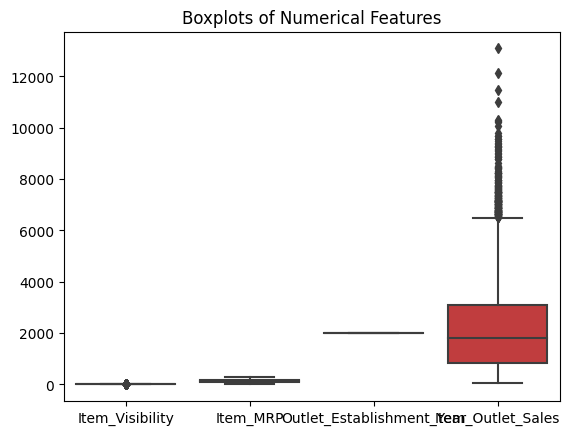

In [88]:
# Decided on seaborn boxplot with all features inside
sns.boxplot(data=df)
plt.title("Boxplots of Numerical Features")
plt.show()

Countplots to view the frequency of each class of categorial features in your dataset.

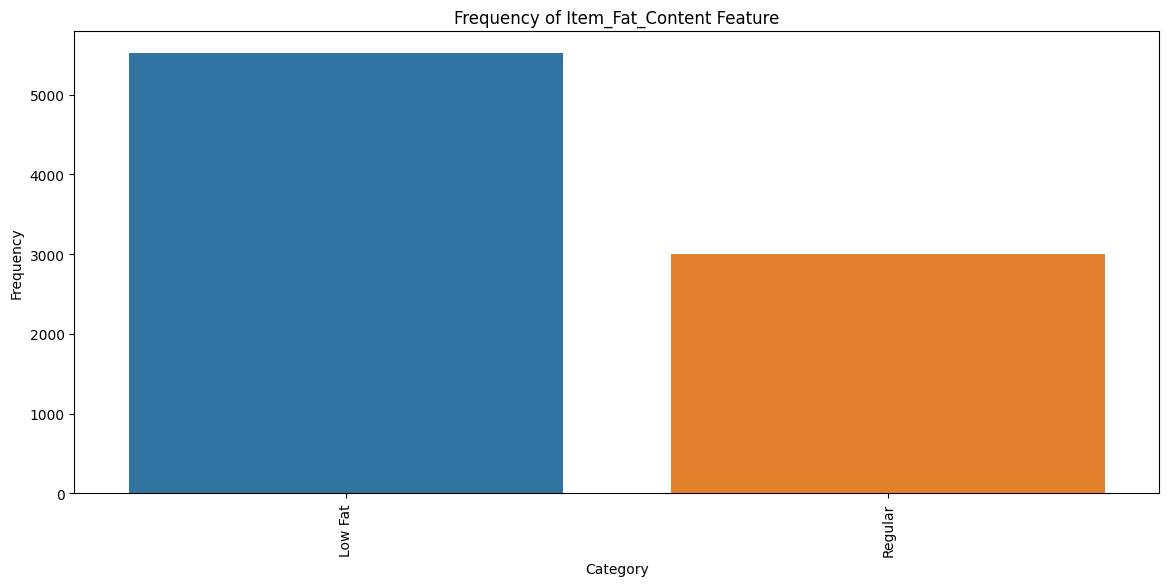

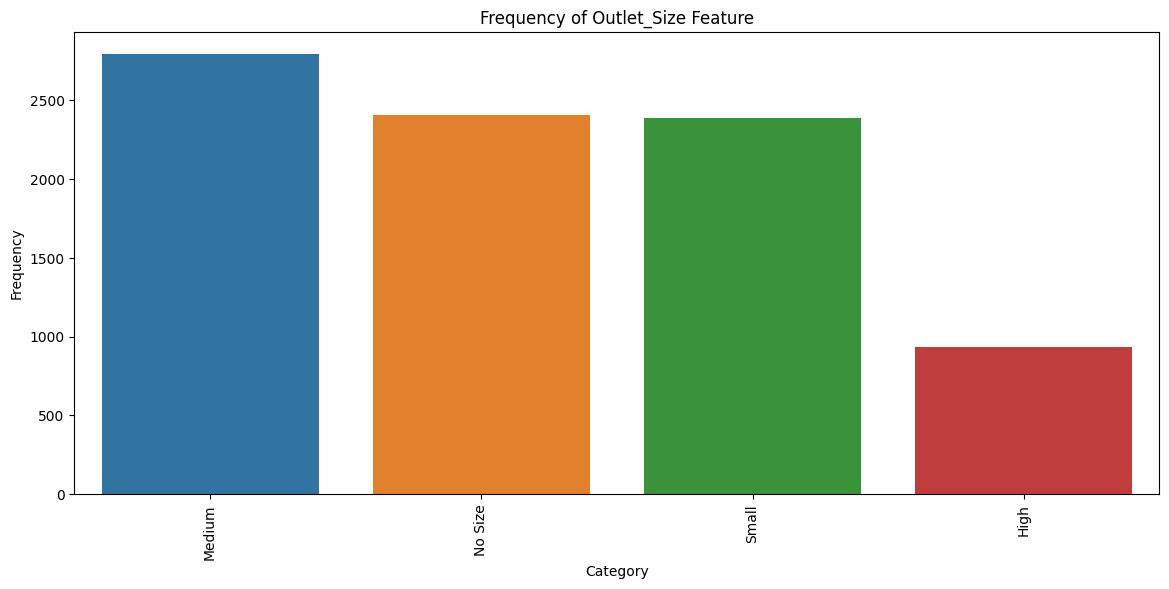

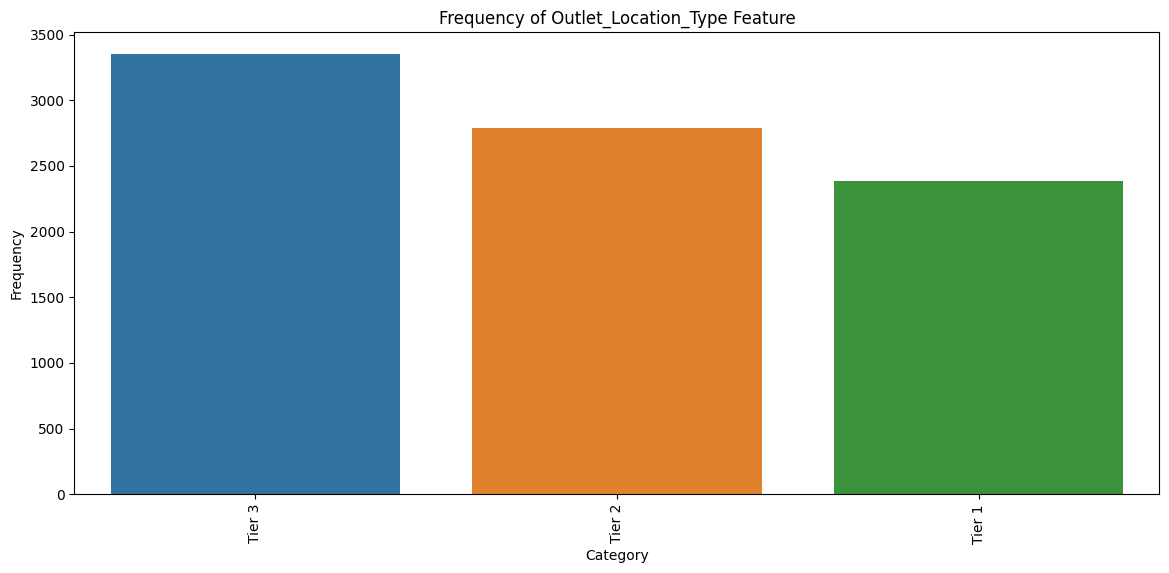

In [89]:
# Countplot for Item_Fat_Content

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
sns.countplot(x='Item_Fat_Content', data=df, order=df['Item_Fat_Content'].value_counts().index)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Item_Fat_Content Feature')
plt.xticks(rotation=90)  # Rotating x-axis labels if they are long
plt.show()

# Countplot for Outlet_Size

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
sns.countplot(x='Outlet_Size', data=df, order=df['Outlet_Size'].value_counts().index)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Outlet_Size Feature')
plt.xticks(rotation=90)  # Rotating x-axis labels if they are long
plt.show()

# Countplot for Outlet_Location_Type
plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
sns.countplot(x='Outlet_Location_Type', data=df, order=df['Outlet_Location_Type'].value_counts().index)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Outlet_Location_Type Feature')
plt.xticks(rotation=90)  # Rotating x-axis labels if they are long
plt.show()

Heatmap to view the correlation between features

In [90]:
# To check all numeric features in the dataframe for correlations, use df.corr()
corr = df.corr()

# tabular view of correlation values
corr

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


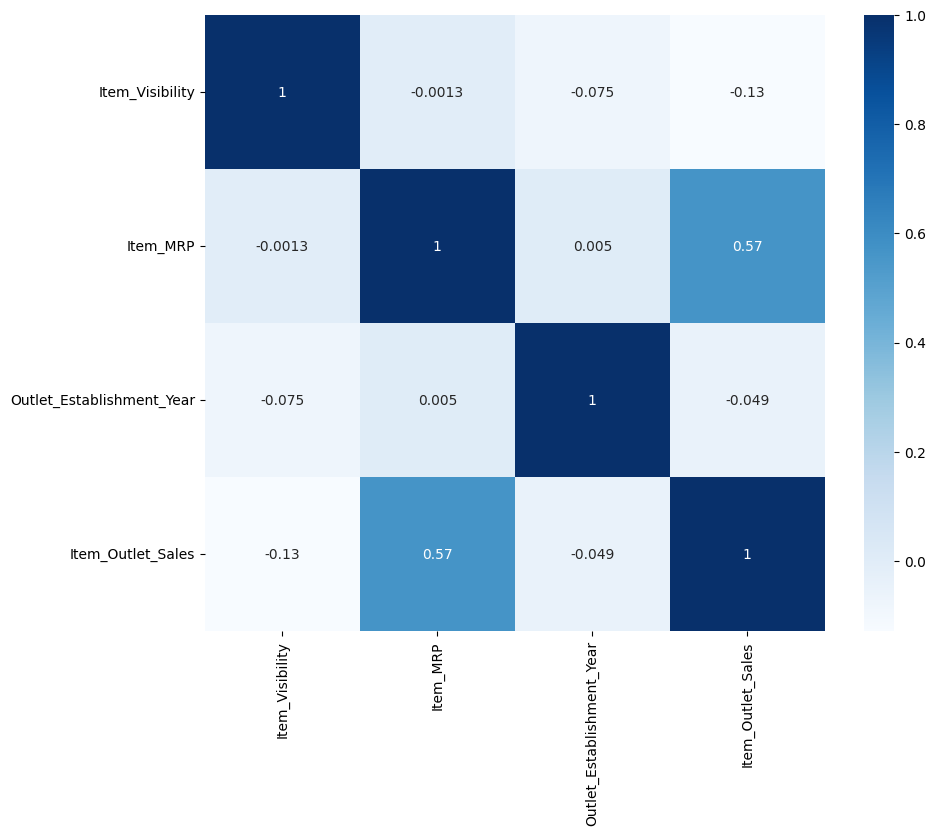

In [91]:
fig, ax = plt.subplots(figsize = (10, 8))

## Define a MatplotLib ax object using sns.heatmap()
ax = sns.heatmap(corr, cmap= 'Blues', annot = True);

## **Project Overview**

Project 1 - Part 5

We will continue to work on your sales prediction project. The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

You should load a fresh version of the [original data set here](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing) using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!


*   Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
*   Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
*   Perform a train test split
*   Create a preprocessing object to prepare the dataset for Machine Learning
*   Make sure your imputation of missing values occurs after the train test split using SimpleImputer.



## **Imports**

In [92]:
# Import required packages
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**

In [93]:


# Save the filep# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

fpath  ="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Data/sales_predictions_2023.csv"

df = pd.read_csv(fpath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Clean Data**

### Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.

1) How many rows and columns?

In [94]:
# Get Dataframe statistics
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

Answer: Rows = 8523 ,
        Columns = 12

In [95]:
item_weight_value_counts = df['Item_Weight'].value_counts()
item_weight_value_counts

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

2) What are the datatypes of each variable?

In [96]:
# Get the datatypes of each comun in the dataframe
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [97]:
# Query for duplicates
df.duplicated().sum()
# Remove duplicates if any exists
df.drop_duplicates(inplace = True)

*   Confirm that the duplicates were dropped.


In [98]:
# Query for duplicates
df.duplicated().sum()

0

4) Identify missing values.
  IMPORTANT: **Missing values will be dropped after the train test split**

In [99]:
# Identify missing values or null values
df.isna().sum()
# Identifying % of missing data
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [100]:
# Find inconsistencies
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [101]:
# Find inconsistencies in all columns
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

Drop Column Item_Identifier due to high cardinality.

In [159]:
df = df.drop('Item_Identifier', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [160]:
# Fix inconsistencies
# Column Item_Fat_Content. Replacing 'LF' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
# Column Item_Fat_Content. Replacing 'low fat' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
# Column Item_Fat_Content. Replacing 'reg' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')


In [161]:
# Find numerical columns
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

# Get the minimum value for each column
min_values = df[num_cols].min()
# print("Minimum values:")
print(min_values)

# Get the maximum value for each column
max_values = df[num_cols].max()
# print("\nMaximum values:")
print(max_values)

# Get the mean value for each column
mean_values = df[num_cols].mean()
# print("\nMean values:")
print(mean_values)

Item_Weight                     4.555
Item_Visibility                 0.000
Item_MRP                       31.290
Outlet_Establishment_Year    1985.000
Item_Outlet_Sales              33.290
dtype: float64
Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64
Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64


### Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [162]:
# Define features (X) and target (y).
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
print(X)
print(y)

      Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Out

### Perform a train test split

In [163]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


## Numerical preprocessors and pipeline

In [164]:
# Defining lists of types of features
num_cols = X_train.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [165]:
# Instantiate the imputer object from the SimpleImputer class with strategy 'median' and instantiate the scaler
impute_median = SimpleImputer(strategy='median')
scaler_num = StandardScaler()
# Instantiate pipeline
num_pipe = make_pipeline(impute_median, scaler_num)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [166]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

## Categorical preprocessors and pipeline

In [167]:
# Get the list of categorical and ordinal column names
ordinal_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type']
cat_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns
cat_cols

Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type'], dtype='object')

In [168]:
# Instantiate the new imputer
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
ohe_cols = X_train.select_dtypes('object').columns
# print("OneHotEncoder Columns:", ohe_cols)
ohe_encoder = OneHotEncoder(sparse_output=False)
scaler_cat = StandardScaler()
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder, scaler_cat)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder', OneHotEncoder(sparse_output=False)),
                ('standardscaler', StandardScaler())])

In [169]:
# Making a ohe_tuple for Categorical ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder', OneHotEncoder(sparse_output=False)),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

## Ordinal preprocessors and pipeline

In [170]:
# Confirm that all null vales in cat columns are filled in training set
ordinal_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type']
impute_ord = SimpleImputer(strategy='constant', fill_value='NA')
Fat_Content_order = ['Low Fat', 'Regular']
Outlet_Size_order = ['NA', 'Small', 'Medium', 'High']
Outlet_Type_order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
ordinal_category_orders = [Fat_Content_order, Outlet_Size_order, Outlet_Type_order ]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
scaler_ord = StandardScaler()
# Making an ord_pipe
ord_pipe = make_pipeline(impute_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                            ['NA', 'Small', 'Medium', 'High'],
                                            ['Grocery Store',
                                             'Supermarket Type1',
                                             'Supermarket Type2',
                                             'Supermarket Type3']])),
                ('standardscaler', StandardScaler())])

In [171]:
# Making a ohe_tuple for Ordinal ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ordinal_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                             ['NA', 'Small', 'Medium', 'High'],
                                             ['Grocery Store',
                                              'Supermarket Type1',
                                              'Supermarket Type2',
                                              'Supermarket Type3']])),
                 ('standardscaler', StandardScaler())]),
 ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'])

##Create a ColumnTransformer to preprocess the data

In [172]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple, ord_tuple],
                                    verbose_feature_names_out=False)

In [174]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('oneh...
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              'Fat',
                                                                              'Regular'],
                                                                             ['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Type'])],
                  verbose_feature_names_out=False)

## Transform the train and test data

In [175]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content,Outlet_Size,Outlet_Type
4776,0.827485,-0.712775,1.828109,1.327849,0.740321,-0.740321,-0.284298,-0.167776,-0.115397,-0.285261,...,-0.615205,-0.700976,1.235105,-0.377964,-1.368035,2.842454,-0.357121,-0.740321,0.748125,0.983572
7510,0.566644,-1.291052,0.603369,1.327849,-1.350766,1.350766,-0.284298,-0.167776,-0.115397,-0.285261,...,-0.615205,-0.700976,1.235105,-0.377964,-1.368035,2.842454,-0.357121,1.350766,0.748125,0.983572
5828,-0.121028,1.813319,0.244541,0.136187,-1.350766,1.350766,-0.284298,-0.167776,-0.115397,-0.285261,...,1.625474,-0.700976,-0.809648,-0.377964,0.730976,-0.351809,-0.357121,1.350766,0.748125,-0.263600
5327,-1.158464,-1.004931,-0.952591,0.732018,0.740321,-0.740321,3.517440,-0.167776,-0.115397,-0.285261,...,-0.615205,1.426583,-0.809648,-0.377964,0.730976,-0.351809,-0.357121,-0.740321,-0.264370,-0.263600
4810,1.538870,-0.965484,-0.336460,0.493686,0.740321,-0.740321,-0.284298,-0.167776,-0.115397,-0.285261,...,-0.615205,1.426583,-0.809648,-0.377964,0.730976,-0.351809,-0.357121,-0.740321,-1.276865,-0.263600
